# ClimateWins Project

## Content
### 1. Importing libraries and data
### 2. Data wrangling and scaling
### 3. Principal Component Analysis (PCA)
### 4. Hierarchical Clustering of reduced data after applying PCA

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [4]:
# Create a path
path="C:/Users/Oksana Stepanova/OneDrive/Документи/ClimateWins/Unsupervised/02 Data/"

In [5]:
# Import data
df=pd.read_csv(os.path.join(path, 'Original Data', 'Dataset-weather-prediction-dataset-processed.csv'))

In [7]:
df.shape

(22950, 170)

In [9]:
df.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


## 2. Data wrangling and scaling

In [11]:
# Create a subset for 2020 year only 
df_2020 = df[df['DATE'].astype(str).str.startswith('2020')]

In [12]:
df_2020.shape

(366, 170)

In [13]:
df_2020.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
21915,20200101,1,0,1.7,0.87,1.0339,0.64,0.00,0,6.5,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
21916,20200102,1,0,3.1,0.87,1.0316,0.65,0.00,0,6.5,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
21917,20200103,1,7,2.2,0.81,1.0287,0.41,0.01,0,1.6,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
21918,20200104,1,6,2.3,0.79,1.0341,0.29,0.14,0,0.9,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
21919,20200105,1,0,0.9,0.85,1.0367,0.67,0.00,0,6.6,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5


In [16]:
# Drop DATE and MONTH columns
df_drop=df_2020.drop(columns=['DATE', 'MONTH'], inplace=False)

In [18]:
df_drop.head()

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
21915,0,1.7,0.87,1.0339,0.64,0.00,0,6.5,-0.4,-3.4,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
21916,0,3.1,0.87,1.0316,0.65,0.00,0,6.5,0.1,-2.0,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
21917,7,2.2,0.81,1.0287,0.41,0.01,0,1.6,5.3,0.8,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
21918,6,2.3,0.79,1.0341,0.29,0.14,0,0.9,6.0,2.3,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
21919,0,0.9,0.85,1.0367,0.67,0.00,0,6.6,1.7,-1.5,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5


In [19]:
#create scaler object using StandardScaler from sklearn.preprocessing
#StandardScaler assumes data is normally distributed and scales with a distribution
#around 0 and standard deviation of 1. Scaling happens independently with each variable.

scaler = StandardScaler()

In [20]:
df_scaled=pd.DataFrame(scaler.fit_transform(df_drop), columns=df_drop.columns)

In [21]:
df_scaled.shape

(366, 168)

In [22]:
df_scaled.head()

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,-1.960538,-0.321292,1.201295,1.910115,-0.711243,-0.486323,0.0,0.185369,-1.822856,-1.817976,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,8.881784e-16,-3.552714e-15,0.0,0.0
1,-1.960538,1.025927,1.201295,1.634160,-0.700149,-0.486323,0.0,0.185369,-1.750121,-1.581078,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,8.881784e-16,-3.552714e-15,0.0,0.0
2,0.875655,0.159857,0.764099,1.286217,-0.966410,-0.460008,0.0,-0.854160,-0.993682,-1.107282,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,8.881784e-16,-3.552714e-15,0.0,0.0
3,0.470485,0.256087,0.618367,1.934111,-1.099541,-0.117914,0.0,-1.002664,-0.891853,-0.853462,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,8.881784e-16,-3.552714e-15,0.0,0.0
4,-1.960538,-1.091132,1.055563,2.246060,-0.677960,-0.486323,0.0,0.206584,-1.517371,-1.496471,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,8.881784e-16,-3.552714e-15,0.0,0.0


In [23]:
# Create list of columns
columns_list = df_scaled.columns.tolist()

In [24]:
columns_list

['BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_

## 3. Principal Component Analysis (PCA)

In [26]:
#Run the PCA model, reducing to 18 components (equal to the number of weather stations)
pca = PCA(n_components=18)
principalComponents = pca.fit_transform(df_scaled)

In [27]:
principalComponents

array([[-10.13544663,   5.62230137,  -4.89586883, ...,  -1.17396964,
          1.09698246,  -0.22003063],
       [ -9.90805115,   3.08094688,  -4.89302453, ...,  -0.74299342,
         -0.41098461,  -1.28962843],
       [ -9.08806721,   1.12673863,  -3.08169528, ...,   0.58896695,
         -1.08410072,   0.07842915],
       ...,
       [-10.2409155 ,  -6.08227433,   5.70319487, ...,   0.05241282,
         -1.2896256 ,  -1.31032389],
       [-10.05452529,  -3.36788068,   2.6921179 , ...,   1.55941778,
          0.51920945,   0.72935759],
       [-11.2486083 ,  -2.24686407,   1.81952731, ...,   0.48386238,
         -0.40716279,   0.19132886]])

In [28]:
#Make a dataframe of the new components
df_PCA = pd.DataFrame(principalComponents, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10', 'PCA11', 'PCA12', 'PCA13', 'PCA14', 'PCA15', 'PCA16', 'PCA17', 'PCA18'])

In [29]:
df_PCA.shape

(366, 18)

In [30]:
df_PCA.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17,PCA18
0,-10.135447,5.622301,-4.895869,-1.407113,0.005848,1.234372,-1.285607,-1.016311,0.939748,1.242748,-0.537645,2.359712,-0.350244,-0.760012,-0.619173,-1.173970,1.096982,-0.220031
1,-9.908051,3.080947,-4.893025,0.032389,0.279812,0.181329,-0.806917,-0.179138,0.871070,0.156134,0.134783,2.092358,-0.749069,0.444281,-2.207232,-0.742993,-0.410985,-1.289628
2,-9.088067,1.126739,-3.081695,0.589431,1.669827,-1.523092,1.901898,0.443541,0.248365,0.045382,1.700090,1.525423,-0.282282,-0.849441,-1.959454,0.588967,-1.084101,0.078429
3,-9.314776,1.911806,-2.287193,-4.131599,4.213558,0.028859,-0.058156,0.071555,0.414695,-1.335190,1.414690,0.765953,-0.406923,1.087840,0.234291,-0.020662,-0.699457,-0.212741
4,-9.391231,4.033870,-4.636769,-2.307070,2.332126,0.775145,-3.194744,0.430945,-0.418871,1.009820,-1.109328,0.197769,-1.317534,-0.980160,1.214384,0.017601,-0.936863,-1.104279


In [31]:
# Export PCA dataframe
df_PCA.to_csv(os.path.join(path, 'Prepared Data', 'weather_2020_PCA.csv'))

## 4. Hierarchical Clustering of reduced data after applying PCA

In [33]:
# Create list of columns
columns_list_PCA = df_PCA.columns.tolist()

In [34]:
columns_list_PCA

['PCA1',
 'PCA2',
 'PCA3',
 'PCA4',
 'PCA5',
 'PCA6',
 'PCA7',
 'PCA8',
 'PCA9',
 'PCA10',
 'PCA11',
 'PCA12',
 'PCA13',
 'PCA14',
 'PCA15',
 'PCA16',
 'PCA17',
 'PCA18']

In [36]:
# Create a Single dendrogram from 2020 data subset after PCA
distance_single = linkage(df_PCA.loc[:,['PCA1',
 'PCA2',
 'PCA3',
 'PCA4',
 'PCA5',
 'PCA6',
 'PCA7',
 'PCA8',
 'PCA9',
 'PCA10',
 'PCA11',
 'PCA12',
 'PCA13',
 'PCA14',
 'PCA15',
 'PCA16',
 'PCA17',
 'PCA18'
]],method="single")

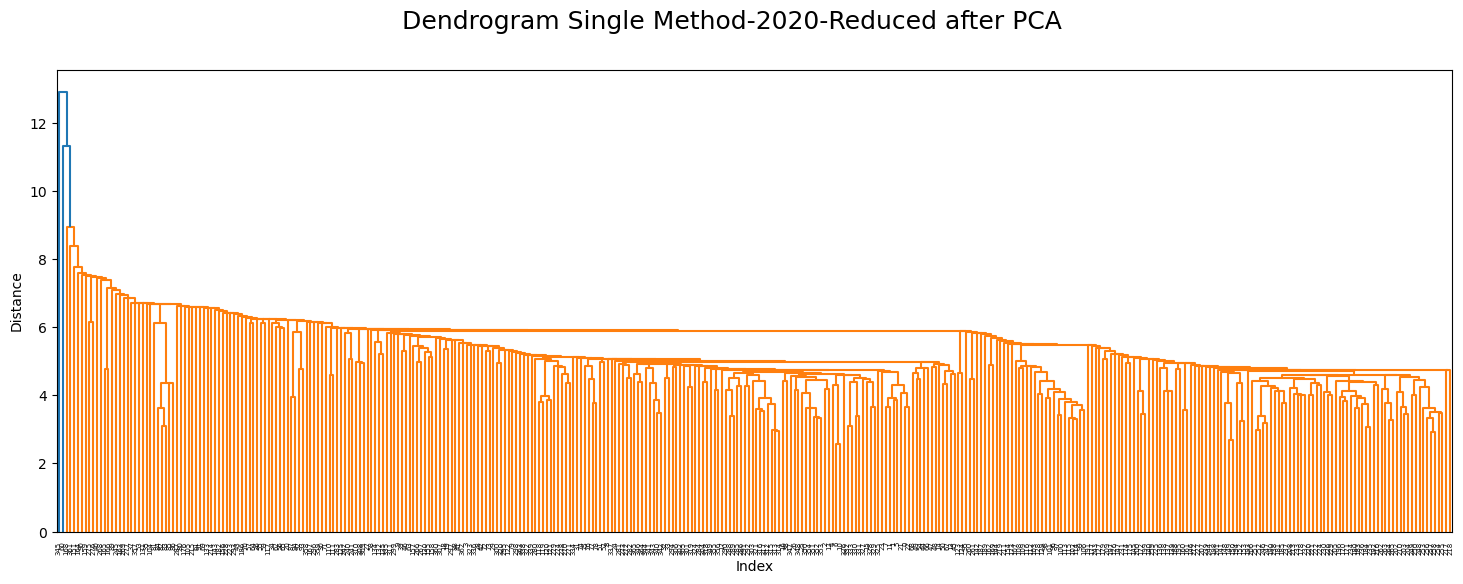

In [37]:
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method-2020-Reduced after PCA",fontsize=18)
plt.show()

In [38]:
# Create a Complete dendrogram from 2020 data subset after PCA
distance_single = linkage(df_PCA.loc[:,['PCA1',
 'PCA2',
 'PCA3',
 'PCA4',
 'PCA5',
 'PCA6',
 'PCA7',
 'PCA8',
 'PCA9',
 'PCA10',
 'PCA11',
 'PCA12',
 'PCA13',
 'PCA14',
 'PCA15',
 'PCA16',
 'PCA17',
 'PCA18'
]],method="complete")

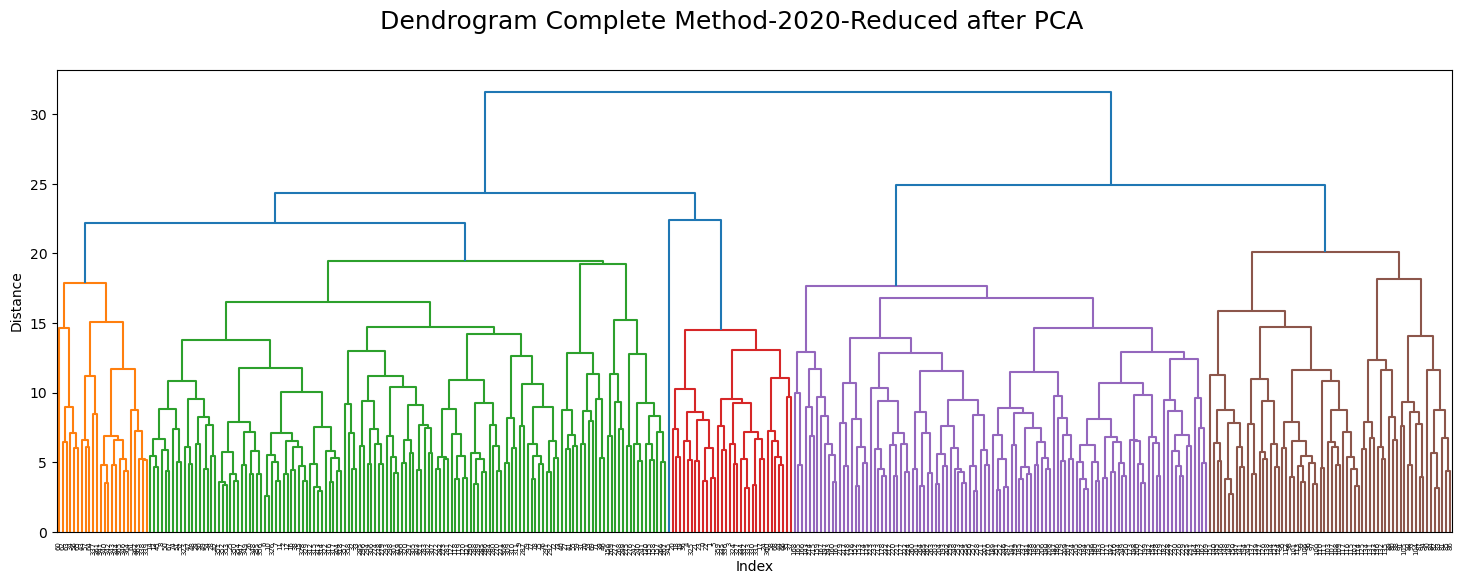

In [39]:
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method-2020-Reduced after PCA",fontsize=18)
plt.show()

In [40]:
# Create an Avarage dendrogram from 2020 data subset after PCA
distance_single = linkage(df_PCA.loc[:,['PCA1',
 'PCA2',
 'PCA3',
 'PCA4',
 'PCA5',
 'PCA6',
 'PCA7',
 'PCA8',
 'PCA9',
 'PCA10',
 'PCA11',
 'PCA12',
 'PCA13',
 'PCA14',
 'PCA15',
 'PCA16',
 'PCA17',
 'PCA18'
]],method="average")

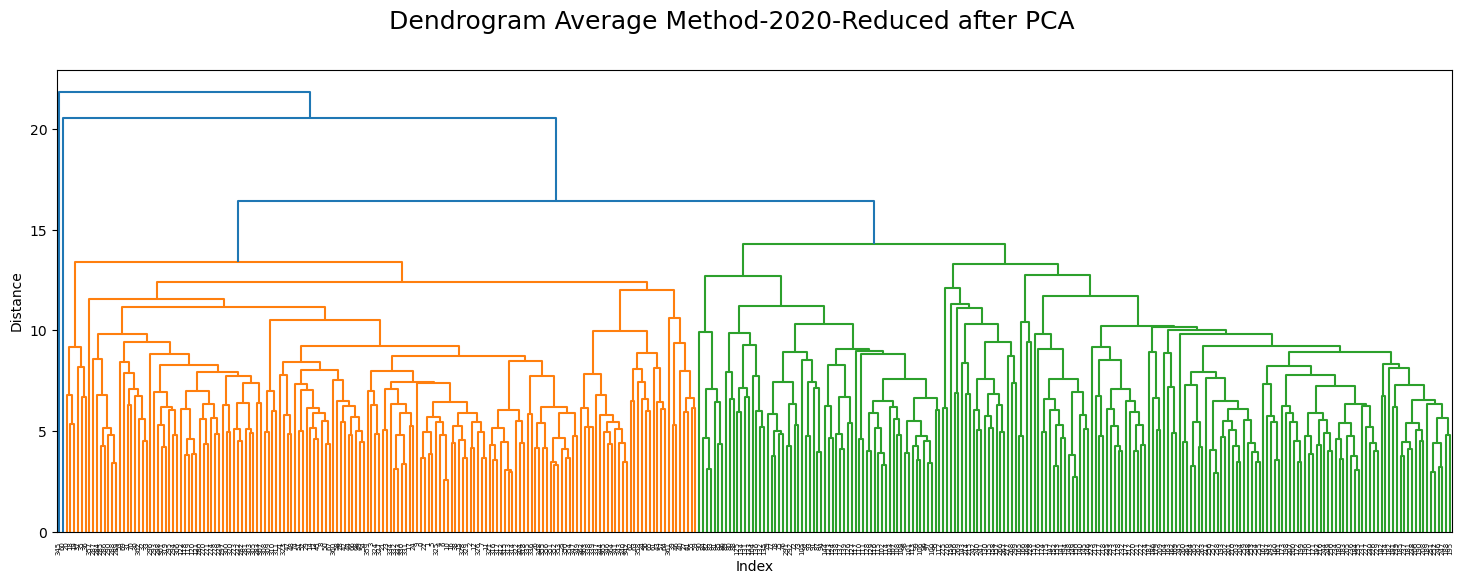

In [41]:
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method-2020-Reduced after PCA",fontsize=18)
plt.show()

In [42]:
# Create a Ward dendrogram from 2020 data subset after PCA
distance_single = linkage(df_PCA.loc[:,['PCA1',
 'PCA2',
 'PCA3',
 'PCA4',
 'PCA5',
 'PCA6',
 'PCA7',
 'PCA8',
 'PCA9',
 'PCA10',
 'PCA11',
 'PCA12',
 'PCA13',
 'PCA14',
 'PCA15',
 'PCA16',
 'PCA17',
 'PCA18'
]],method="ward")

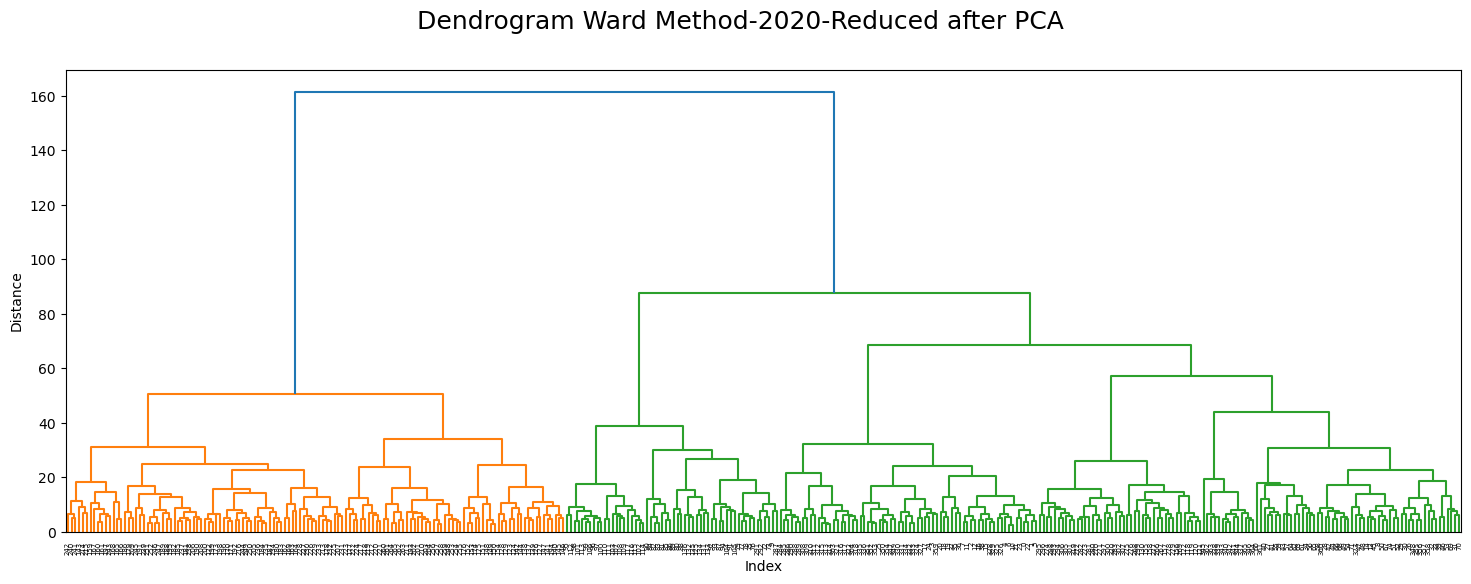

In [43]:
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method-2020-Reduced after PCA",fontsize=18)
plt.show()